In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(autoload_with=engine, reflect=True)
# reflect the tables
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [37]:
Base.classes.keys()

['measurement', 'station']

In [38]:
Measurement=Base.classes.measurement
Station=Base.classes.station

In [39]:
session= Session(engine)

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
session = Session(engine)
recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date within the dataset is: {recentdate}")

The most recent date within the dataset is: ('2017-08-23',)


            Precipitation
Date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
...                   ...
2017-08-22           0.00
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]


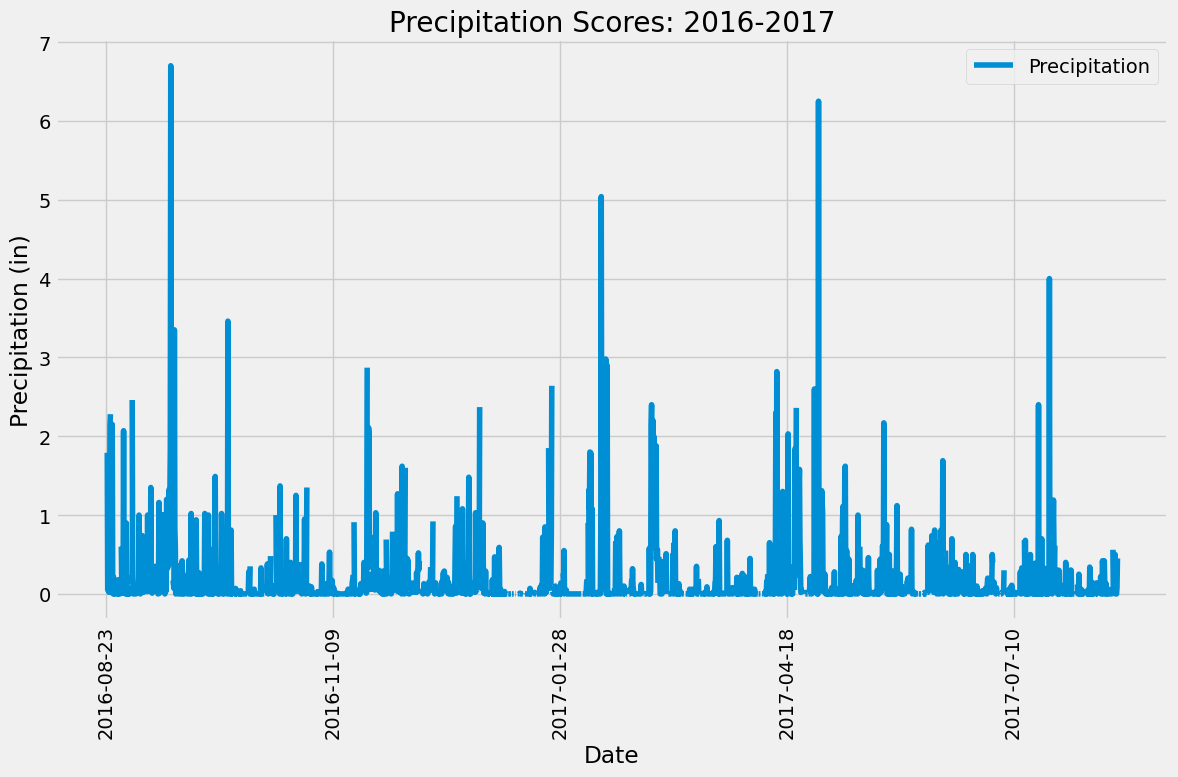

<Figure size 640x480 with 0 Axes>

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date=dt.datetime(2016, 8, 23)

# Calculate the date one year from the last date in data set.
previousyear = dt.date(2017,8,23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= previousyear).all()
precipitation_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
precipitation_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df.sort_index(inplace=True)
print(precipitation_df)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=90, figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.title("Precipitation Scores: 2016-2017")
plt.tight_layout()
plt.show()

plt.savefig('PrecipitationGraph', dpi=100)

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
print(summary_stats)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).distinct().count()

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

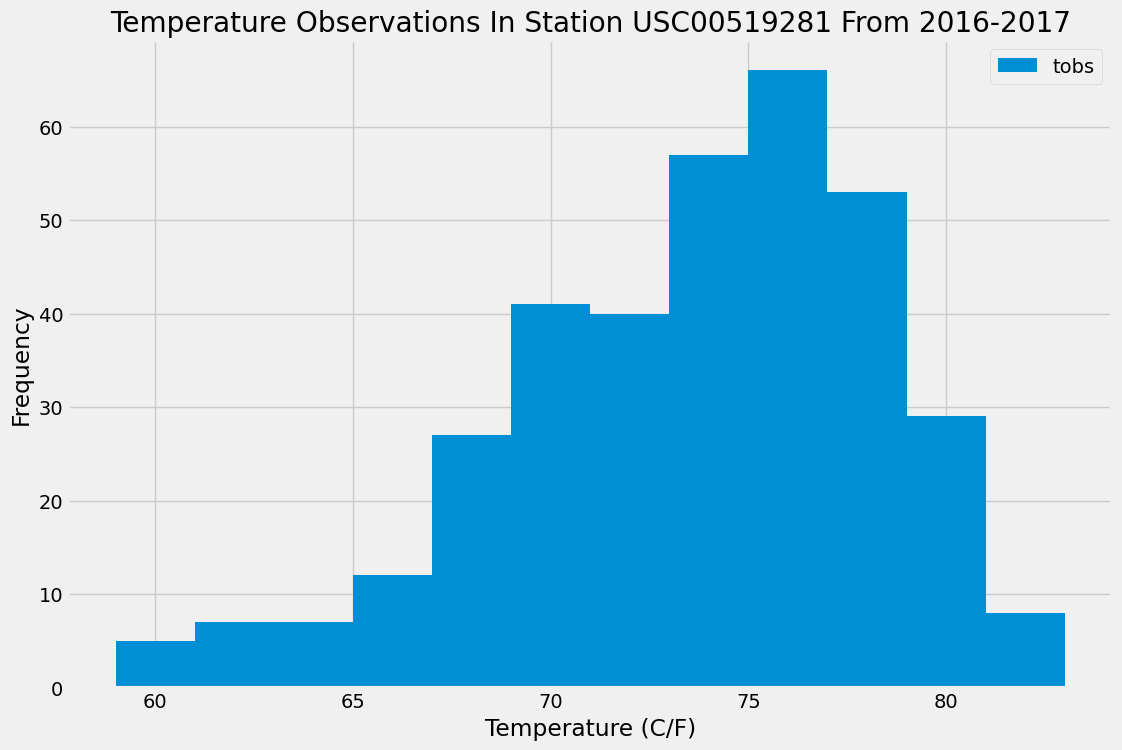

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= previousyear).all()
temperature_df = pd.DataFrame(temperature, columns=['tobs'])
temperature_df.plot.hist(bins=12)
plt.title("Temperature Observations In Station USC00519281 From 2016-2017")
plt.xlabel("Temperature (C/F)")
plt.gcf().set_size_inches(12, 8)
plt.savefig('TemperatureObsevation', dpi=100)

# Close session

In [31]:
# Close Session
session.close()